![](../Assets/itd.png)

    
# Analisis de Datos 
## Visualizacion Avanzada de Datos
### José Gabriel Rodriguez Rivas    
### Angel Omar Ceniceros Berumen


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data from csv file into a dataframe and display the first few rows
df_compact = pd.read_csv('./Data/rpi_data_compact.csv ')

In [3]:
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [4]:
# Remove extra index columns
df_compact.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ping (ms)          673 non-null    float64
 1   Download (Mbit/s)  673 non-null    float64
 2   Upload (Mbit/s)    673 non-null    float64
 3   Date               673 non-null    object 
 4   Time               673 non-null    object 
dtypes: float64(3), object(2)
memory usage: 26.4+ KB


In [6]:
# How many values in dataframe are NaN?
df_compact.isnull().sum(axis = 0)

Ping (ms)            0
Download (Mbit/s)    0
Upload (Mbit/s)      0
Date                 0
Time                 0
dtype: int64

In [7]:
df_compact=df_compact.dropna()

supongo que el archivo que tenia ya lo había limpiado en practicas anteriores

In [8]:

df_compact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 672
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ping (ms)          673 non-null    float64
 1   Download (Mbit/s)  673 non-null    float64
 2   Upload (Mbit/s)    673 non-null    float64
 3   Date               673 non-null    object 
 4   Time               673 non-null    object 
dtypes: float64(3), object(2)
memory usage: 31.5+ KB


In [9]:
df_compact['Ping (ms)'] = df_compact['Ping (ms)'].apply(lambda val: float(val))
df_compact['Download (Mbit/s)'] = df_compact['Download (Mbit/s)'].apply(lambda val: float(val))

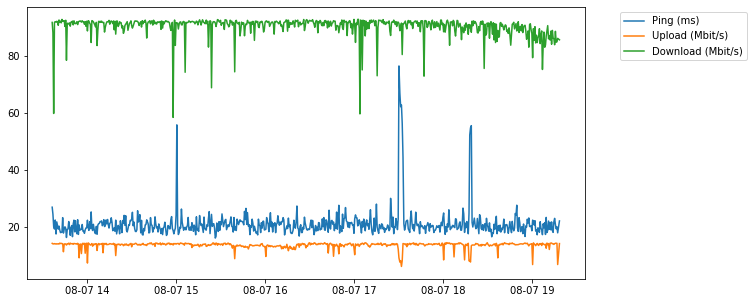

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_compact['Time'])
ax.plot(t, df_compact['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_compact['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_compact['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.legend(bbox_to_anchor=(1.3, 1.))
plt.show()

In [11]:
acceptable_upload = 13 
acceptable_download = 88 
acceptable_ping = 20 

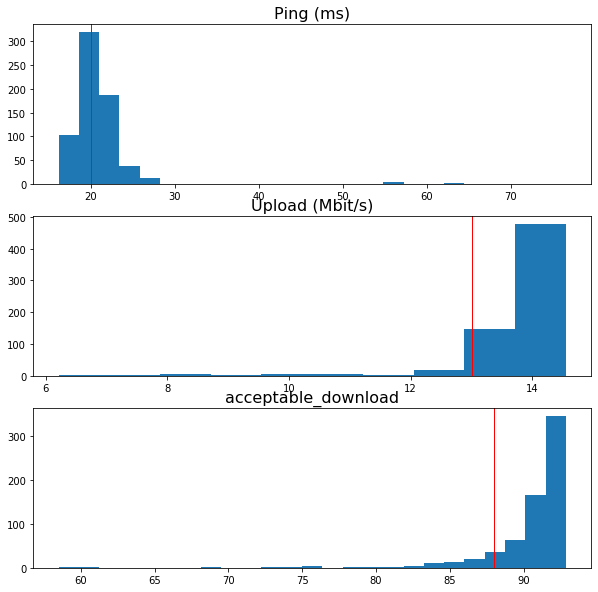

In [12]:

fig, ax = plt.subplots(3 ,figsize=(10,10))

ax[0].hist(df_compact['Ping (ms)'], 25)
# plot acceptable ping 
ax[0].axvline(acceptable_ping, color='red', linewidth=1)
ax[0].set_title('Ping (ms)', fontsize=16)
# plot upload speed
ax[1].hist(df_compact['Upload (Mbit/s)'])
# plot acceptable upload
ax[1].axvline(acceptable_upload, color='red', linewidth=1)
ax[1].set_title('Upload (Mbit/s)', fontsize=16)
# plot download speed
ax[2].hist(df_compact['Download (Mbit/s)'], 25)
# plot acceptable download
ax[2].axvline(acceptable_download, color='red', linewidth=1)
ax[2].set_title('acceptable_download', fontsize=16)

plt.show()

In [13]:
meansd = df_compact['Download (Mbit/s)'].mean()
standsd = df_compact['Download (Mbit/s)'].std()
meansu = df_compact['Upload (Mbit/s)'].mean()
standsu = df_compact['Upload (Mbit/s)'].std()
meanps = df_compact['Ping (ms)'].mean()
standsp = df_compact['Ping (ms)'].std()

In [14]:
quote_ping = (meanps['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])
print('Average ping time: {} ± {} ms'.format(*quote_ping))
print('Average Upload time: {} ± {} ms'.format(*quote_ping))
print('Average Download time: {} ± {} ms'.format(*quote_ping))

print('Distance of acceptable Ping speed from average: {:.2f} standard deviations'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
print('Distance of acceptable Upload speed from average: {:.2f} standard deviations'.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))
print('Distance of acceptable Download speed from average: {:.2f} standard deviations'.format((quote_download[0]-acceptable_download)/quote_download[1]))

TypeError: 'float' object is not subscriptable

In [15]:
print('{:.2f}% of measurements are lower than the acceptable download speed.'.format(np.sum(df_compact['Download (Mbit/s)']<acceptable_download)/float(len(df_compact))*100))
print('{:.2f}% of measurements are lower than the acceptable upload speed.'.format(np.sum(df_compact['Upload (Mbit/s)']<acceptable_upload)/float(len(df_compact))*100))
print('{:.2f}% of measurements are lower than the acceptable ping speed.'.format(np.sum(df_compact['Ping (ms)']<acceptable_ping)/float(len(df_compact))*100))

11.00% of measurements are lower than the acceptable download speed.
7.88% of measurements are lower than the acceptable upload speed.
42.79% of measurements are lower than the acceptable ping speed.


In [16]:
all_three = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable in three cases.'.format(all_three/float(len(df_compact))*100))

0.59% of measurements are not acceptable in three cases.


In [17]:
ping_upload = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable for ping and upload.'.format(ping_upload/float(len(df_compact))*100))

ping_download = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for ping and download.'.format(ping_download/float(len(df_compact))*100))

upload_download = np.sum((df_compact['Upload (Mbit/s)']<acceptable_upload) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for ping and upload.'.format(upload_download/float(len(df_compact))*100))

2.97% of measurements are not acceptable for ping and upload.
4.61% of measurements are not acceptable for ping and download.
1.34% of measurements are not acceptable for ping and upload.
